# Quadtrees iterating on pairs of neighbouring items

A quadtree is a tree data structure in which each node has exactly four children. It is a particularly efficient way to store elements when you need to quickly find them according to their x-y coordinates.

A common problem with elements in quadtrees is to detect pairs of elements which are closer than a definite threshold.

The proposed implementation efficiently addresses this problem.

In [1]:
from smartquadtree import Quadtree

## Creation & insertion of elements

As you instantiate your quadtree, you must specify the center of your space then the height and width.

In [2]:
q = Quadtree(0, 0, 10, 10)

The output of a quadtree on the console is pretty explicit. (You can refer to next section for the meaning of "No mask set")

In [3]:
q

Total number of elements: 0
No mask set

You can easily insert elements from which you can naturally infer x-y coordinates (e.g. tuples or lists)

In [4]:
q.insert((1, 2))
q.insert((-3, 4))
q

Total number of elements: 2
No mask set
First elements:
    (1, 2),
    (-3, 4),
  

No error is raised if the element you are trying to insert is outside the scope of the quadtree. But it won't be stored anyway!

In [5]:
q.insert((-20, 0))
q

Total number of elements: 2
No mask set
First elements:
    (1, 2),
    (-3, 4),
  

If you want to insert other Python objects, be sure to provide `get_x()` and `get_y()` methods to your class!

In [6]:
class Point(object):

    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.color = color

    def __repr__(self):
        return "(%.2f, %.2f) %s" % (self.x, self.y, self.color)

    def get_x(self):
        return self.x

    def get_y(self):
        return self.y


You cannot insert elements of a different type from the first element inserted.

In [7]:
q.insert(Point(2, -7, "red"))

But feel free to create a new one and play with it:

In [8]:
point_quadtree = Quadtree(5, 5, 5, 5)
point_quadtree.insert(Point(2, 7, "red"))
point_quadtree

Total number of elements: 1
No mask set
First elements:
    (2.00, 7.00) red,
  

## Simple iteration

In [9]:
from random import random
q = Quadtree(0, 0, 10, 10, 16)
for a in range(50):
    q.insert([random()*20-10, random()*20-10])

The `print` function does not display all elements and uses the `__repr__()` method of each element.

In [10]:
print(q)

Total number of elements: 50
No mask set
First elements:
    [5.576253335483335, 2.9926458306078647],
    [2.956289387002718, 3.792134207741281],
    [3.9903269308895766, 5.492168007874362],
    ...


We can write our own iterator and print each element we encounter the way we like.

In [11]:
from __future__ import print_function
for p in q.elements():
    print ("[%.2f, %.2f]" % (p[0], p[1]), end=" ")

[5.58, 2.99] [2.96, 3.79] [3.99, 5.49] [3.43, 1.10] [7.73, 4.09] [9.67, 6.81] [2.95, 4.12] [0.14, 5.80] [2.77, 7.87] [0.05, 1.61] [-8.74, 7.64] [-1.22, 1.90] [-0.95, 3.91] [-3.17, 1.09] [-7.41, 4.26] [-8.25, 6.47] [-6.91, 3.80] [-3.73, 3.10] [-5.74, 8.80] [8.50, -9.31] [2.49, -9.10] [6.64, -8.61] [0.40, -2.93] [7.99, -4.08] [4.71, -6.75] [0.12, -1.84] [0.72, -2.94] [9.62, -9.90] [0.15, -9.75] [8.67, -7.19] [2.44, -3.60] [5.08, -8.63] [8.86, -1.87] [1.07, -9.43] [-7.96, -5.53] [-2.53, -5.75] [-1.31, -5.81] [-7.24, -3.55] [-8.76, -9.37] [-8.48, -1.33] [-1.28, -0.69] [-6.60, -4.65] [-4.28, -0.89] [-7.56, -7.31] [-4.72, -7.02] [-1.98, -2.33] [-3.43, -5.74] [-3.71, -1.13] [-1.01, -7.29] [-2.04, -5.90] 

It is easy to filter the iteration process and apply the function only on elements inside a given polygon. Use the `set_mask()` method and pass a list of x-y coordinates. The polygon will be automatically closed.

In [12]:
q.set_mask([(-3, -7), (-3, 7), (3, 7), (3, -7)])
print(q)

Total number of elements: 50
Total number of elements inside mask: 15
First elements inside the mask:
    [2.956289387002718, 3.792134207741281],
    [2.945472950394006, 4.1166899654293765],
    [0.14379102547949074, 5.797490949080599],
    ...


The same approach can be used to count the number of elements inside the quadtree.

In [13]:
print (sum (1 for x in q.elements()))
print (sum (1 for x in q.elements(ignore_mask=True)))


15
50


As a mask is set on the quadtree, we only counted the elements inside the mask. You can use the `size()` method to count elements and ignore the mask by default. Disabling the mask with `set_mask(None)` is also a possibility.

In [14]:
print ("%d elements (size method)" % q.size())
print ("%d elements (don't ignore the mask)" % q.size(False))

q.set_mask(None)
print ("%d elements (disable the mask)" % q.size())

50 elements (size method)
15 elements (don't ignore the mask)
50 elements (disable the mask)


## Playing with plots

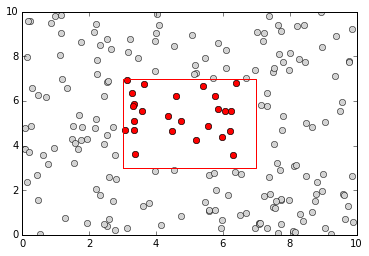

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
    
q = Quadtree(5, 5, 5, 5, 10)

for a in range(200):
    q.insert([random()*10, random()*10])
    
fig = plt.figure()
plt.axis([0, 10, 0, 10])

q.set_mask(None)
for p in q.elements():
    plt.plot([p[0]], [p[1]], 'o', color='lightgrey')

q.set_mask([(3, 3), (3, 7), (7, 7), (7, 3)])

for p in q.elements():
    plt.plot([p[0]], [p[1]], 'ro')

_ = plt.plot([3, 3, 7, 7, 3], [3, 7, 7, 3, 3], 'r')


## Iteration on pairs of neighbouring elements

Iterating on pairs of neighbouring elements is possible through the `neighbour_elements()` function. It works as a generator and yields pair of elements, the first one being inside the mask (if specified), the second one being in the same cell or in any neighbouring cell, also in the mask.

Note that if `(a, b)` is yielded by `neighbour_elements()`, `(b, a)` will be omitted from future yields.

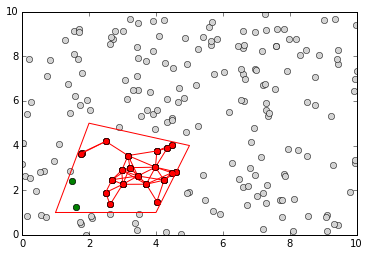

In [16]:
# Let's start with a new quadtree because we need
q = Quadtree(5, 5, 5, 5, 10)
q.set_limitation(2)  # do not create a new subdivision if one side of the cell is below 2

for a in range(200):
    q.insert([random()*10, random()*10])

fig = plt.figure()
plt.axis([0, 10, 0, 10])

for p in q.elements():
    plt.plot([p[0]], [p[1]], 'o', color='lightgrey')

q.set_mask([(1, 1), (4, 1), (5, 4), (2, 5), (1, 1)])
    
for p in q.elements():
    plt.plot([p[0]], [p[1]], 'o', color='green')
    
for p1, p2 in q.neighbour_elements():
    if ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2 < 1):
        plt.plot([p1[0]], [p1[1]], 'o', color='red')
        plt.plot([p2[0]], [p2[1]], 'o', color='red')
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'red')

_ = plt.plot([1, 4, 5, 2, 1], [1, 1, 4, 5, 1], 'r')
